<a href="https://colab.research.google.com/github/khixson1/Food-Sales-Prediction-Using-Machine-Learning/blob/main/Project1_Part5_Food_Sales_Predictions_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Food_Sales_Predictions_Using_Machine_Learning

Kim Hixson

In [549]:
# Mount Drive in Google's Collaboratory

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [550]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config
set_config(display='diagram')
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor


In [551]:
# upload sales_prediction.csv data
# read .csv into collaboratory
# check dataframe using head function

filename = "/content/drive/MyDrive/Colab Notebooks/Coding Dojo/Week_1/Data_Uploads/sales_predictions.csv"
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [552]:
# 1) How many rows and columns?

print("The dataset has {} rows and {} columns".format(df.shape[0], df.shape[1]))


The dataset has 8523 rows and 12 columns


In [553]:
# 2) What are the datatypes of each variable?

display(df.dtypes)



Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [554]:
# 3) Are there duplicates? If so, drop any duplicates. (There seems to be no duplicate rows)

# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = df[df.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

df = df.drop_duplicates()



Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales]
Index: []


In [555]:
# check column names for spaces or other problematic strings
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [556]:
# 1b) Identify missing values in this dataset.
# display the info of the dataframe which shows missing values and datatypes

display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


None

In [557]:
# use value_counts to look for inconsistancies in categories within each column

# value_counts of 'Attrition' column
attrition_cat = pd.Series(df['Item_Identifier']).value_counts()
display(attrition_cat)
print('________________________________________')

# value_counts of 'BusinessTravel' column
business_travel_cat = pd.Series(df['Item_Fat_Content']).value_counts()
display(business_travel_cat)
print('________________________________________')

# value_counts of 'Department' column
department_cat = pd.Series(df['Item_Type']).value_counts()
display(department_cat)
print('________________________________________')

# value_counts of 'EducationField' column
education_cat = pd.Series(df['Outlet_Identifier']).value_counts()
display(education_cat)
print('________________________________________')

# value_counts of 'Gender' column
gender_cat = pd.Series(df['Outlet_Size']).value_counts()
display(gender_cat)
print('________________________________________')

# value_counts of 'JobRole' column
jobrole_cat = pd.Series(df['Outlet_Location_Type']).value_counts()
display(jobrole_cat)
print('________________________________________')

# value_counts of 'MaritalStatus' column
marital_cat = pd.Series(df['Outlet_Type']).value_counts()
display(marital_cat)
print('________________________________________')


FDW13    10
FDG33    10
FDG09     9
FDV38     9
FDQ40     9
         ..
FDE52     1
DRF48     1
FDY43     1
FDC23     1
FDT35     1
Name: Item_Identifier, Length: 1559, dtype: int64

________________________________________


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

________________________________________


Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

________________________________________


OUT027    935
OUT013    932
OUT049    930
OUT035    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

________________________________________


Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

________________________________________


Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

________________________________________


Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

________________________________________


In [558]:
# Value counts from above shows that there are 3 different notations for low fat, and two notations for regular
# We will correct these columns here and use groupby to show the correction

df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'}, inplace=True)
df

df.groupby(['Item_Fat_Content']).count()




,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Fat_Content,,,,,,,,,,,
Low Fat,5517,4566,5517,5517,5517,5517,5517,3955,5517,5517,5517
Regular,3006,2494,3006,3006,3006,3006,3006,2158,3006,3006,3006


# Using Machine Learning and a Linear Regression Model to Predict Food Sales

In [559]:
#View data again to see if numberical data can be transformed into categorical data

display(df.nunique())
display(df.info())

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                2
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


None

Outlet_Establishment_Year is small enough to be converted to categorical data

In [560]:
#transform 'Outlet_Establishment_Year' into object type variables for one-hot encoding

df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   object 
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), object(8)
memory usage: 865.6+ KB


In [561]:
# Machine learning prediction about future sales
# Identify the target (X) and features (y): 
# Assign the "Item_Outlet_Sales" column as the target and the rest of the relevant variables as your features matrix

X = df.drop(columns=['Item_Outlet_Sales', 'Item_Identifier'])
y = df['Item_Outlet_Sales']

In [562]:
# Perform a Test/Train Split
# Set random_state to 42 for reproducibility

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [563]:
# Select columns to separate into numerical and categorical data
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [564]:
#select categorical columns
cat_data = X_train[cat_selector(X_train)]
display(cat_data.head())

num_data = X_train[num_selector(X_train)]
display(num_data.head())

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,Low Fat,Household,OUT018,2009,Medium,Tier 3,Supermarket Type2
7510,Regular,Snack Foods,OUT018,2009,Medium,Tier 3,Supermarket Type2
5828,Regular,Meat,OUT049,1999,Medium,Tier 1,Supermarket Type1
5327,Low Fat,Baking Goods,OUT035,2004,Small,Tier 2,Supermarket Type1
4810,Low Fat,Frozen Foods,OUT045,2002,NaN,Tier 2,Supermarket Type1


,Item_Weight,Item_Visibility,Item_MRP
4776,16.350,0.029565,256.4646
7510,15.250,0.000000,179.7660
5828,12.350,0.158716,157.2946
5327,7.975,0.014628,82.3250
4810,19.350,0.016645,120.9098


In [565]:
# unique values
cat_data.nunique()

Item_Fat_Content              2
Item_Type                    16
Outlet_Identifier            10
Outlet_Establishment_Year     9
Outlet_Size                   3
Outlet_Location_Type          3
Outlet_Type                   4
dtype: int64

In [566]:
# Instantiate Transformers
mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')
scaler = StandardScaler()
ohe_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore', categories='auto')

In [567]:
# Make Pipelines for each column type
num_pipe = make_pipeline(mean_imputer, scaler)
cat_pipe = make_pipeline(freq_imputer, ohe_encoder)

In [568]:
# Match pipe to column
num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)

In [569]:
# Make column Transformer
column_transformer = make_column_transformer(num_tuple, cat_tuple, remainder='passthrough')
column_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f1da58c2910>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f1da58c2cd0>)])

In [570]:
# Instantiate regression estimator
lin_reg = LinearRegression()

In [571]:
# combine into a pipeline
pipe = make_pipeline(column_transformer, lin_reg)
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f1da58c2910>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f1da58c2cd0>)])),
                ('linearregression', LinearRegression())])

In [572]:
# fit pipeline

pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f1da58c2910>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f1da58c2cd0>)])),
                ('linearregression', LinearRegression())])

In [573]:
# Evaluation of the Linear Model based on R^2

print(f'Train R2: {r2_score(y_train, pipe.predict(X_train))}')
print(f'Test R2: {r2_score(y_test, pipe.predict(X_test))}')

Train R2: 0.5615551090745479
Test R2: 0.5671097899521406


In [574]:
# Evaluation of the Linear Model based on RMSE

print(f'Train RMSE: {np.sqrt(mean_squared_error(y_train, pipe.predict(X_train)))}')
print(f'Test RMSE: {np.sqrt(mean_squared_error(y_test, pipe.predict(X_test)))}')

Train RMSE: 1139.1041364027496
Test RMSE: 1092.856009562054


#Using Machine Learning and a Simple Regression Tree to Predict Food Sales

In [575]:
# Make an instance of the a Decision Tree Regressor Model

dec_tree = DecisionTreeRegressor(random_state = 42)

In [576]:
# Combine into a decision tree pipeline
pipe2 = make_pipeline(column_transformer, dec_tree)
pipe2

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f1da58c2910>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f1da58c2cd0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [577]:
# Fit the decision tree model pipeline using your training data.  The model is learning the relationship between the features (X) and the target (y).

pipe2.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f1da58c2910>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f1da58c2cd0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [578]:
# Evaluation of the Decision Tree Regressor Model based on R^2

print(f'Train R2: {r2_score(y_train, pipe2.predict(X_train))}')
print(f'Test R2: {r2_score(y_test, pipe2.predict(X_test))}')

Train R2: 1.0
Test R2: 0.13893062395728917


The simple decision tree regressor produces a model that is overfit.

In [579]:
# Evaluation of the Decision Tree Regressor Model based on RMSE

print(f'Train RMSE: {np.sqrt(mean_squared_error(y_train, pipe.predict(X_train)))}')
print(f'Test RMSE: {np.sqrt(mean_squared_error(y_test, pipe.predict(X_test)))}')

Train RMSE: 1139.1041364027496
Test RMSE: 1092.856009562054


In [581]:
# Viewing the decision tree depth and number of leaves

print(f'Depth of Decision Tree: {dec_tree.get_depth()}')
print(f'Number of Leaves in Decision Tree: {dec_tree.get_n_leaves()}')

Depth of Decision Tree: 44
Number of Leaves in Decision Tree: 6278


#Between a Linear Regression Model and a Simple Decision Tree Regressor, I would recommend a Linear Regression Model because the Simple Decision Tree Regressor Model overfits the data.

# Visualizations:

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.567574
Item_Outlet_Sales,0.014123,-0.128625,0.567574,1.000000


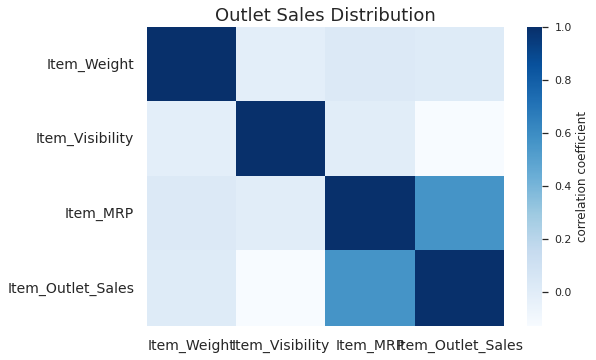

In [582]:
# 12) Create a heatmap of the correlation between numeric categories.
df_cor = df.corr()
display(df_cor)

sns.heatmap(df_cor, cmap = 'Blues', cbar_kws={'label': 'correlation coefficient'});
plt.title("Outlet Sales Distribution", fontsize = 18);
plt.xticks(fontsize = 14);
plt.yticks(fontsize = 14);


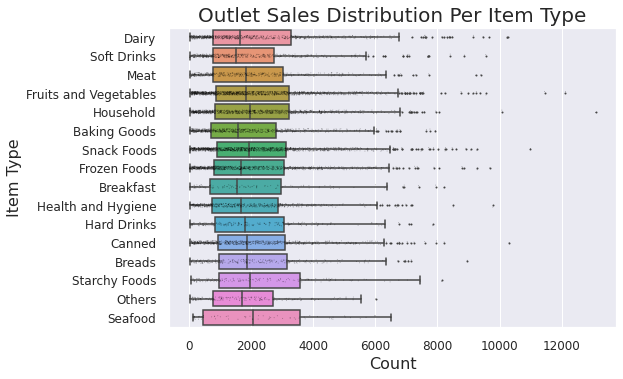

In [584]:
# Boxplots of "Item_Outlet_Sales" data per "Item_Type" category
my_box_2 = sns.boxplot(x = df['Item_Outlet_Sales'], y = df['Item_Type'], data = df, flierprops= dict(marker = 'o', markersize = 1));
# Add in points to show each observation
sns.stripplot(x = df['Item_Outlet_Sales'], y = df['Item_Type'], data = df,
              size=1, color="black", marker = 'o', alpha = 0.3)
plt.title("Outlet Sales Distribution Per Item Type", fontsize = 20);
plt.xlabel("Count", fontsize = 16);
plt.ylabel("Item Type", fontsize = 16);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);
plt.show()


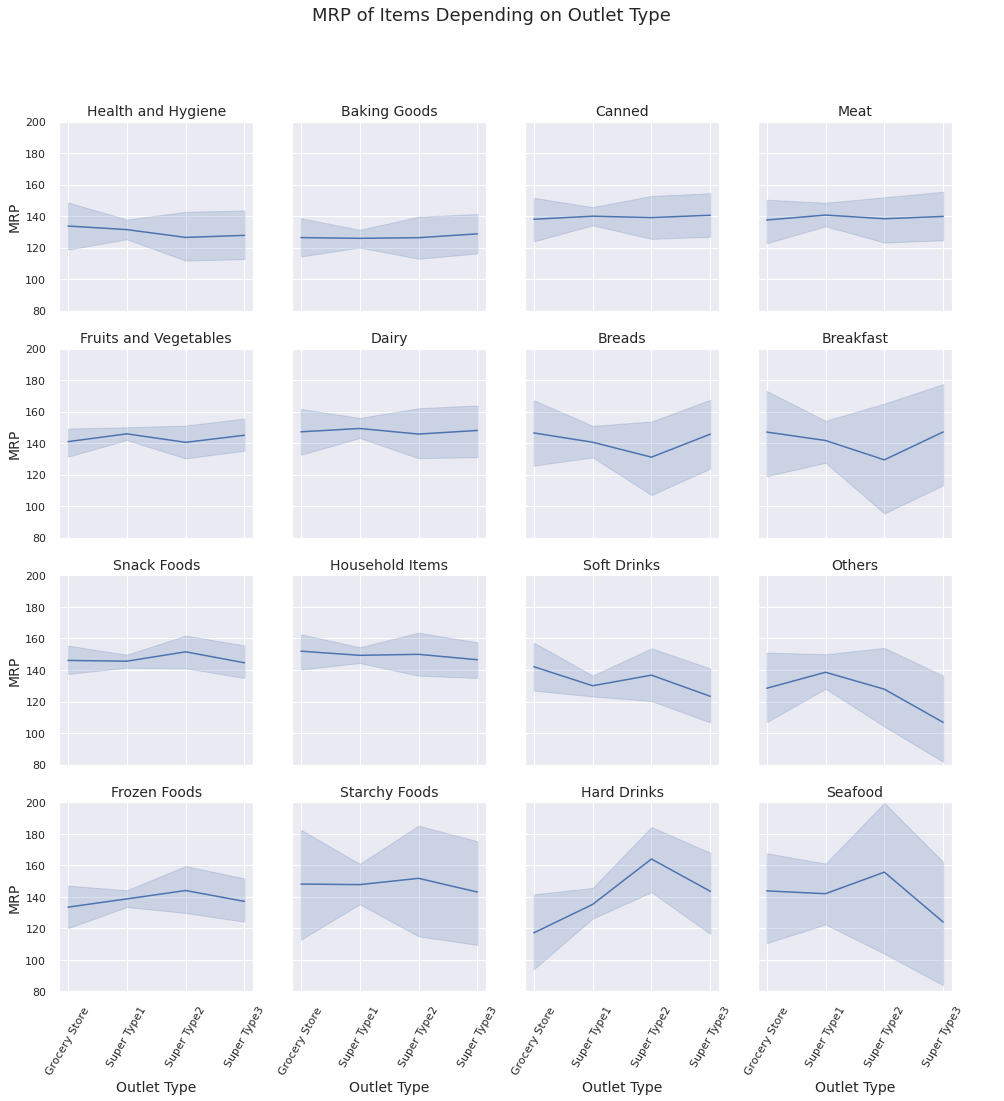

In [585]:
#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (4 rows, 4 columns)
fig, axes = plt.subplots(4, 4, figsize=(16, 16));
fig.suptitle('MRP of Items Depending on Outlet Type', fontsize=18);

#plot1
ax1 = sns.lineplot(data=health_df,
             x = health_df['Outlet_Type'], 
             y = health_df['Item_MRP'],
             ax = axes[0,0]);
ax1.set_title('Health and Hygiene', fontsize=14);
ax1.set_xlabel('');
ax1.set_ylabel('');
ax1.set_ylim(80, 200);
ax1.set_ylabel('MRP', fontsize=14);
ax1.set_xticklabels('');
ax1.tick_params(axis='x', colors='white');

#plot2
ax2 = sns.lineplot(data=baking_df,
             x = baking_df['Outlet_Type'], 
             y = baking_df['Item_MRP'],
             ax = axes[0,1]);
ax2.set_title('Baking Goods', fontsize=14);
ax2.set_xlabel('');
ax2.set_ylabel('');
ax2.set_ylim(80, 200);
ax2.set_yticklabels('');
ax2.tick_params(axis='x', colors='white')

#plot3
ax3 = sns.lineplot(data=canned_df,
             x = canned_df['Outlet_Type'], 
             y = canned_df['Item_MRP'],
             ax = axes[0,2]);
ax3.set_title('Canned', fontsize=14);
ax3.set_xlabel('');
ax3.set_ylabel('');
ax3.set_ylim(80, 200);
ax3.set_yticklabels('');
ax3.tick_params(axis='x', colors='white')

#plot4
ax4 = sns.lineplot(data=meat_df,
             x = meat_df['Outlet_Type'], 
             y = meat_df['Item_MRP'],
             ax = axes[0,3]);
ax4.set_title('Meat', fontsize=14);
ax4.set_xlabel('');
ax4.set_ylabel('');
ax4.set_ylim(80, 200);
ax4.set_yticklabels('');
ax4.tick_params(axis='x', colors='white')

#plot5
ax5 = sns.lineplot(data=fruits_veg_df,
             x = fruits_veg_df['Outlet_Type'], 
             y = fruits_veg_df['Item_MRP'],
             ax = axes[1,0]);
ax5.set_title('Fruits and Vegetables', fontsize=14);
ax5.set_xlabel('');
ax5.set_ylabel('');
ax5.set_ylim(80, 200);
ax5.set_ylabel('MRP', fontsize=14);
ax5.tick_params(axis='x', colors='white')

#plot6
ax6 = sns.lineplot(data=dairy_df,
             x = dairy_df['Outlet_Type'], 
             y = dairy_df['Item_MRP'],
             ax = axes[1,1]);
ax6.set_title('Dairy', fontsize=14);
ax6.set_xlabel('');
ax6.set_ylabel('');
ax6.set_ylim(80, 200);
ax6.set_yticklabels('');
ax6.tick_params(axis='x', colors='white')

#plot7
ax7 = sns.lineplot(data=bread_df,
             x = bread_df['Outlet_Type'], 
             y = bread_df['Item_MRP'],
             ax = axes[1,2]);
ax7.set_title('Breads', fontsize=14);
ax7.set_xlabel('');
ax7.set_ylabel('');
ax7.set_ylim(80, 200);
ax7.set_yticklabels('');
ax7.tick_params(axis='x', colors='white')

#plot8
ax8 = sns.lineplot(data=breakfast_df,
             x = breakfast_df['Outlet_Type'], 
             y = breakfast_df['Item_MRP'],
             ax = axes[1,3]);
ax8.set_title('Breakfast', fontsize=14);
ax8.set_xlabel('');
ax8.set_ylabel('');
ax8.set_ylim(80, 200);
ax8.set_yticklabels('');
ax8.tick_params(axis='x', colors='white')

#plot9
ax9 = sns.lineplot(data=snack_df,
             x = snack_df['Outlet_Type'], 
             y = snack_df['Item_MRP'],
             ax = axes[2,0]);
ax9.set_title('Snack Foods', fontsize=14);
ax9.set_xlabel('');
ax9.set_ylabel('');
ax9.set_ylim(80, 200);
ax9.set_ylabel('MRP', fontsize=14);
ax9.tick_params(axis='x', colors='white')

#plot10
ax10 = sns.lineplot(data=household_df,
             x = household_df['Outlet_Type'], 
             y = household_df['Item_MRP'],
             ax = axes[2,1]);
ax10.set_title('Household Items', fontsize=14);
ax10.set_xlabel('');
ax10.set_ylabel('');
ax10.set_ylim(80, 200);
ax10.set_yticklabels('');
ax10.tick_params(axis='x', colors='white')

#plot11
ax11 = sns.lineplot(data=soft_df,
             x = soft_df['Outlet_Type'], 
             y = soft_df['Item_MRP'],
             ax = axes[2,2]);
ax11.set_title('Soft Drinks', fontsize=14);
ax11.set_xlabel('');
ax11.set_ylabel('');
ax11.set_ylim(80, 200);
ax11.set_yticklabels('');
ax11.tick_params(axis='x', colors='white')

#plot12
ax12 = sns.lineplot(data=other_df,
             x = other_df['Outlet_Type'], 
             y = other_df['Item_MRP'],
             ax = axes[2,3]);
ax12.set_title('Others', fontsize=14);
ax12.set_xlabel('');
ax12.set_ylabel('');
ax12.set_ylim(80, 200);
ax12.set_yticklabels('');
ax12.tick_params(axis='x', colors='white')

#plot13
ax13 = sns.lineplot(data=frozen_df,
             x = frozen_df['Outlet_Type'], 
             y = frozen_df['Item_MRP'],
             ax = axes[3,0]);
ax13.set_title('Frozen Foods', fontsize=14);
ax13.set_xlabel('');
ax13.set_ylabel('');
ax13.set_ylim(80, 200);
ax13.set_ylabel('MRP', fontsize=14);
ax13.set_xlabel("Outlet Type", fontsize = 14)
ax13.set_xticklabels(["Grocery Store","Super Type1","Super Type2","Super Type3"])
ax13.set_xticklabels(ax13.get_xticklabels(), rotation=60);

#plot14
ax14 = sns.lineplot(data=starchy_df,
             x = starchy_df['Outlet_Type'], 
             y = starchy_df['Item_MRP'],
             ax = axes[3,1]);
ax14.set_title('Starchy Foods', fontsize=14);
ax14.set_xlabel('');
ax14.set_ylabel('');
ax14.set_ylim(80, 200);
ax14.set_yticklabels('');
ax14.set_xlabel("Outlet Type", fontsize = 14)
ax14.set_xticklabels(["Grocery Store","Super Type1","Super Type2","Super Type3"])
ax14.set_xticklabels(ax14.get_xticklabels(), rotation=60);

#plot15
ax15 = sns.lineplot(data=hard_df,
             x = hard_df['Outlet_Type'], 
             y = hard_df['Item_MRP'],
             ax = axes[3,2]);
ax15.set_title('Hard Drinks', fontsize=14);
ax15.set_xlabel('');
ax15.set_ylabel('');
ax15.set_ylim(80, 200);
ax15.set_yticklabels('');
ax15.set_xlabel("Outlet Type", fontsize = 14)
ax15.set_xticklabels(["Grocery Store","Super Type1","Super Type2","Super Type3"])
ax15.set_xticklabels(ax15.get_xticklabels(), rotation=60);

#plot16
ax16 = sns.lineplot(data=sea_df,
             x = sea_df['Outlet_Type'], 
             y = sea_df['Item_MRP'],
             ax = axes[3,3]);
ax16.set_title('Seafood', fontsize=14);
ax16.set_xlabel('');
ax16.set_ylabel('');
ax16.set_ylim(80, 200);
ax16.set_yticklabels('');
ax16.set_xlabel("Outlet Type", fontsize = 14)
ax16.set_xticklabels(["Grocery Store","Super Type1","Super Type2","Super Type3"])
ax16.set_xticklabels(ax16.get_xticklabels(), rotation=60);

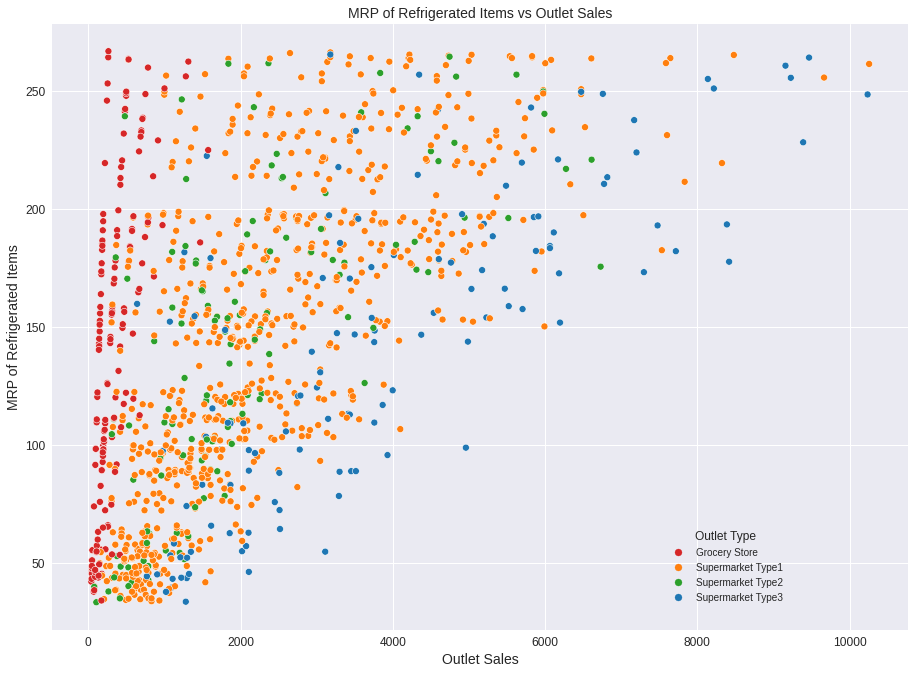

In [586]:
# set style for the plot
plt.style.use('seaborn');

# make a relplot to show Item MRP according to Item Outlet Sales according to Outlet Type
ord = ['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3']
palette = ['tab:red', 'tab:orange', 'tab:green', 'tab:blue']
ax = sns.relplot(data=fridge_items,
            x=fridge_items['Item_Outlet_Sales'],
            y=fridge_items['Item_MRP'],
            hue=fridge_items['Outlet_Type'],
            hue_order = ord,
            palette = palette,
            legend = 'full'
            );


# define fonts, labels and titles
plt.title('MRP of Refrigerated Items vs Outlet Sales', fontsize=14);
plt.xlabel('Outlet Sales', fontsize=14);
plt.ylabel('MRP of Refrigerated Items', fontsize=14);
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

# set figure size
ax.fig.set_size_inches(20,10)

# set legend parameters
leg = ax._legend
leg.set_bbox_to_anchor([0.55, 0.15])
leg.set_title('Outlet Type')